##  Veille régression logistique 

La régression logistique est une méthode utilisée pour **prédire une réponse binaire**, c’est-à-dire une variable qui ne peut prendre que deux valeurs (par exemple : malade ou non, 0 ou 1, oui ou non).

Elle permet de **modéliser la probabilité qu’un événement se produise** en fonction de différentes caractéristiques (âge, poids, tension, etc.).

C’est un outil très utilisé en médecine pour estimer des **risques de maladies** ou de complications à partir de données patients. Elle est simple, rapide à entraîner, et offre des résultats souvent faciles à interpréter.

Dans notre cas, elle sert à prédire si un patient présente un **risque cardio-vasculaire** ou non.


## Explication des données 

- AGE : age in number of days (integer)
- HEIGHT : height in cm (integer)
- WEIGHT : weight in kg (integer)
- GENDER : gender, categorical (1: female, 2: male)
- AP_HIGH : systolic blood pressure (integer)
- AP_LOW : diastolic blood pressure (integer)
- CHOLESTEROL : cholesterol level, categorical (1: normal, 2: above normal, 3: well above normal)
- GLUCOSE : glucose level, categorical (1: normal, 2: above normal, 3: well above normal) 
- SMOKE : if patient smokes or not, categorical (0: no, 1: yes)
- ALCOHOL : if patient drinks alcohol or not, categorical (0: no, 1: yes)
- PHYSICAL_ACTIVITY : if patient is active or not, categorical (0: no, 1: yes)
 
### -and target variable

- CARDIO_DISEASE : if patient got the disease or not, categorical (0: no, 1: yes)

In [1]:
import pandas as pd


## Exploration des données

In [2]:
df = pd.read_csv("cardio_train.csv")
print(df.shape)
df.head()


(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Prétraitement des données

In [4]:

df_clean = df.copy()


initial_rows = df_clean.shape[0]

df_clean = df_clean[(df_clean["height"] >= 140) & (df_clean["height"] <= 200)]
df_clean = df_clean[(df_clean["weight"] >= 40) & (df_clean["weight"] <= 150)]


final_rows = df_clean.shape[0]


print("Dimensions après nettoyage :", df_clean.shape)
print("Le nettoyage a enlevé", initial_rows - final_rows, "lignes du jeu de données.")



Dimensions après nettoyage : (69751, 13)
Le nettoyage a enlevé 249 lignes du jeu de données.


In [5]:
df_clean.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69751.000000,69751.000000,69751.000000,69751.000000,69751.000000,69751.000000,69751.00000,69751.000000,69751.000000,69751.000000,69751.000000,69751.000000,69751.000000
mean,49972.600063,19469.000846,1.349744,164.466445,74.165091,128.830483,96.59506,1.367092,1.226420,0.088228,0.053791,0.803730,0.499749
std,28853.128864,2466.455579,0.476892,7.803498,14.109042,154.279663,188.57303,0.680455,0.572226,0.283628,0.225607,0.397178,0.500004
min,0.000000,10798.000000,1.000000,140.000000,40.000000,-150.000000,-70.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25011.000000,17665.500000,1.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50006.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74885.500000,21325.500000,2.000000,170.000000,82.000000,140.000000,90.00000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,200.000000,150.000000,16020.000000,11000.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

## Visualitation des données

C:\Users\alixcover\AppData\Local\Temp\ipykernel_21692\2811402774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x="height", kind="box", palette="coolwarm")


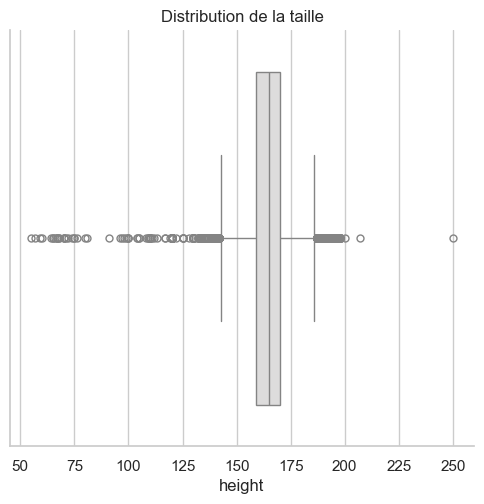

In [7]:
sns.set_theme(style="whitegrid")

sns.catplot(data=df, x="height", kind="box", palette="coolwarm")

sns

plt.title("Distribution de la taille")
plt.show()

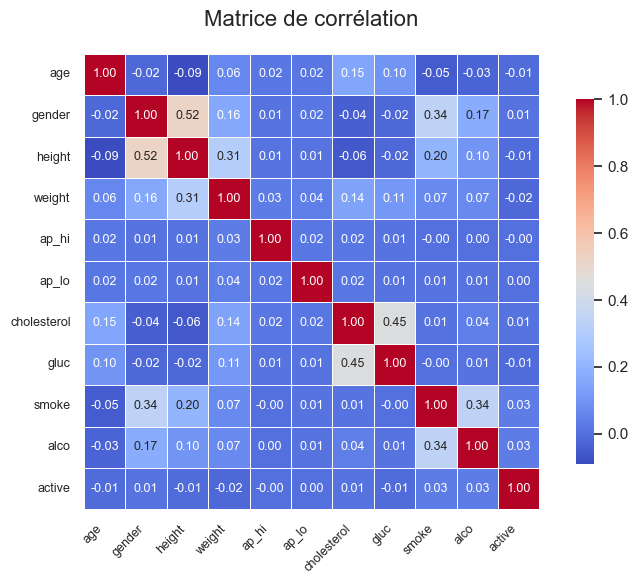

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

ordered_columns = [
    "age", "gender", "height", "weight", 
    "ap_hi", "ap_lo", "cholesterol", "gluc", 
    "smoke", "alco", "active"
]

corr_matrix = df_clean[ordered_columns].corr().round(2)

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9}
)

plt.title("Matrice de corrélation", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


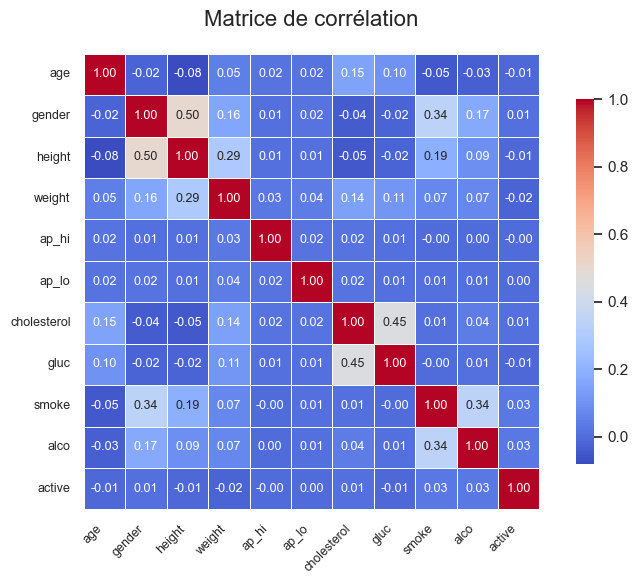

In [9]:
ordered_columns = [
    "age", "gender", "height", "weight", 
    "ap_hi", "ap_lo", "cholesterol", "gluc", 
    "smoke", "alco", "active"
]

corr_matrix = df[ordered_columns].corr().round(2)

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9}
)

plt.title("Matrice de corrélation", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

### Stantardisation des donées

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

df_standardized = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

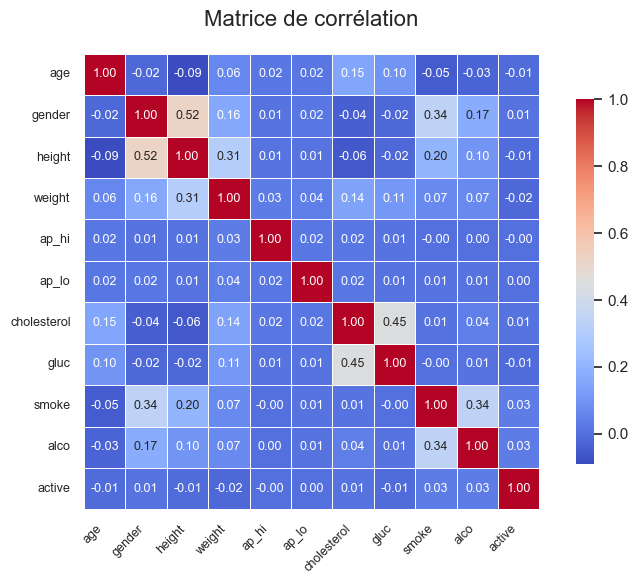

In [12]:
ordered_columns = [
    "age", "gender", "height", "weight", 
    "ap_hi", "ap_lo", "cholesterol", "gluc", 
    "smoke", "alco", "active"
]

corr_matrix = df_standardized[ordered_columns].corr().round(2)
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9}
)

plt.title("Matrice de corrélation", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

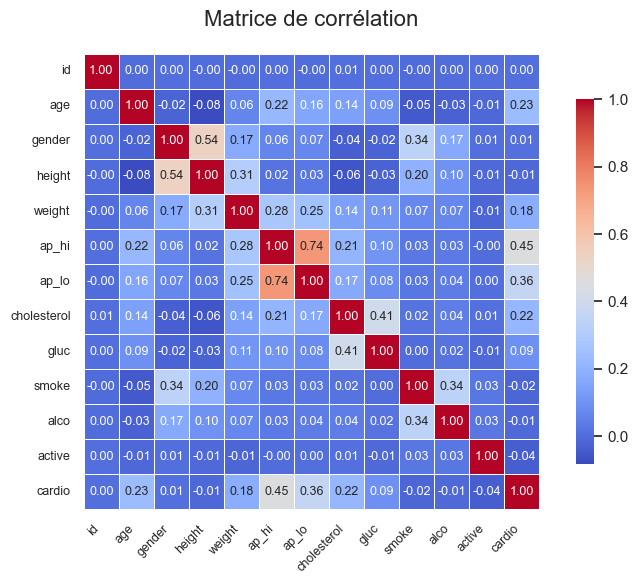

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_clean.corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9}
)

plt.title("Matrice de corrélation", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


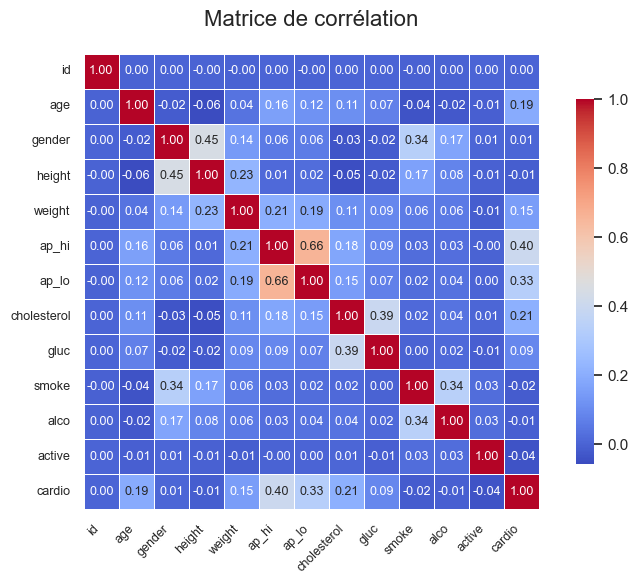

In [14]:
corr_matrix = df_clean.corr(method='kendall')

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9}
)

plt.title("Matrice de corrélation", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


La standardisation n'étant pas pertinante on garde les valeurs initiales

## Entrainement du modèle

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from algo import LogitRegression


X = df_clean[["age","gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active"]]
Y = df_clean["cardio"]

In [16]:
# Feature scaling (important for gradient descent!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=1/3, random_state=0)

# Model training    
model = LogitRegression(learning_rate=0.01, iterations=1000)
print("Training model...")
model.fit(X_train, Y_train)

# Prediction on test set
Y_pred = model.predict(X_test)
Y_prob = model.predict_proba(X_test)

# Calculate accuracy using the built-in method
train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


Training model...
Training Accuracy: 0.6487 (64.87%)
Test Accuracy: 0.6534 (65.34%)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
14872,21618,1,167,85.0,130,90,3,1,0,0,1
42822,22090,1,159,87.0,160,100,1,3,0,0,1
35521,16781,1,158,72.0,120,80,1,1,0,0,0
47171,21102,1,158,89.0,110,70,3,1,0,0,1
65743,15196,2,169,70.0,110,70,1,1,0,0,1


In [18]:
model = LogisticRegression(max_iter=1000, C=1.0, penalty='l2', solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))


Accuracy : 0.7112751774066375
Rapport de classification :
               precision    recall  f1-score   support

           0       0.69      0.76      0.72      6907
           1       0.74      0.67      0.70      7044

    accuracy                           0.71     13951
   macro avg       0.71      0.71      0.71     13951
weighted avg       0.71      0.71      0.71     13951



c:\Users\alixcover\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

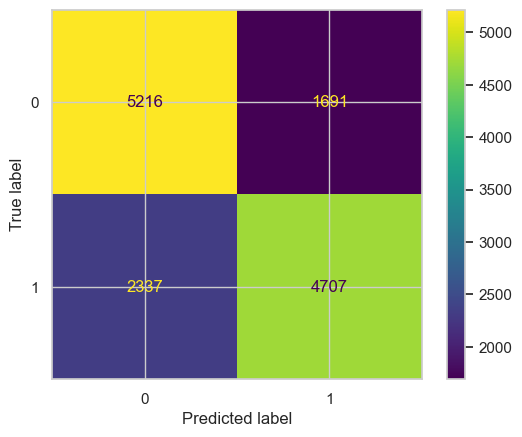

In [20]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [21]:
scores =[]
scores.append(accuracy_score(y_test, y_pred))
scores

[0.7112751774066375]

In [22]:
X = df_clean[["smoke","alco","active"]]
y = df_clean["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,smoke,alco,active
14872,0,0,1
42822,0,0,1
35521,0,0,0
47171,0,0,1
65743,0,0,1


In [23]:
model = LogisticRegression(max_iter=1000, C=1.0, penalty='l2', solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))


Accuracy : 0.5093541681599886
Rapport de classification :
               precision    recall  f1-score   support

           0       0.50      0.82      0.62      6907
           1       0.54      0.20      0.30      7044

    accuracy                           0.51     13951
   macro avg       0.52      0.51      0.46     13951
weighted avg       0.52      0.51      0.46     13951



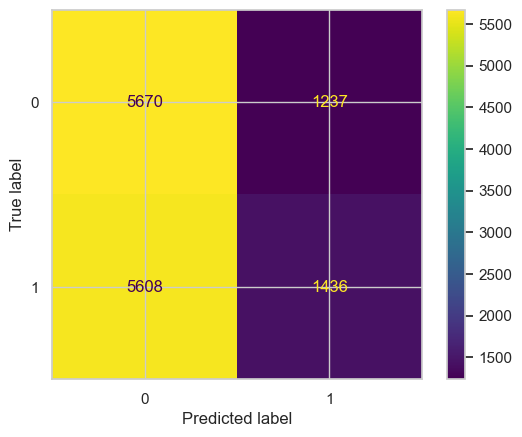

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [25]:
scores.append(accuracy_score(y_test, y_pred))
scores

[0.7112751774066375, 0.5093541681599886]

In [26]:
X = df_clean[["age","gender","height","weight"]]
y = df_clean["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,age,gender,height,weight
14872,21618,1,167,85.0
42822,22090,1,159,87.0
35521,16781,1,158,72.0
47171,21102,1,158,89.0
65743,15196,2,169,70.0


In [27]:
model = LogisticRegression(max_iter=1000, C=1.0, penalty='l2', solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Accuracy : 0.6272668625904954
Rapport de classification :
               precision    recall  f1-score   support

           0       0.62      0.62      0.62      6907
           1       0.63      0.63      0.63      7044

    accuracy                           0.63     13951
   macro avg       0.63      0.63      0.63     13951
weighted avg       0.63      0.63      0.63     13951



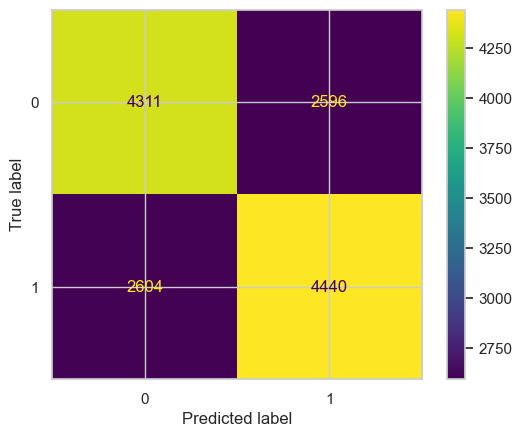

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [29]:
scores.append(accuracy_score(y_test, y_pred))
scores

[0.7112751774066375, 0.5093541681599886, 0.6272668625904954]

In [30]:
X = df_clean[["ap_hi","ap_lo","cholesterol","gluc"]]
y = df_clean["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,ap_hi,ap_lo,cholesterol,gluc
14872,130,90,3,1
42822,160,100,1,3
35521,120,80,1,1
47171,110,70,3,1
65743,110,70,1,1


In [31]:
model = LogisticRegression(max_iter=1000, C=1.0, penalty='l2', solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Accuracy : 0.7154325854777436
Rapport de classification :
               precision    recall  f1-score   support

           0       0.67      0.82      0.74      6907
           1       0.78      0.61      0.68      7044

    accuracy                           0.72     13951
   macro avg       0.73      0.72      0.71     13951
weighted avg       0.73      0.72      0.71     13951



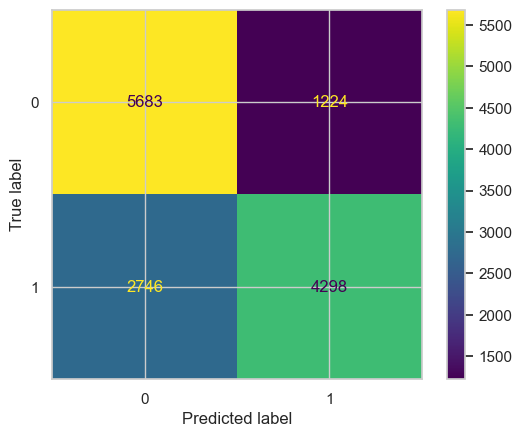

In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [33]:
scores.append(accuracy_score(y_test, y_pred))
scores

[0.7112751774066375,
 0.5093541681599886,
 0.6272668625904954,
 0.7154325854777436]

In [34]:
X = df_clean[["age","gender","height","weight","ap_hi","ap_lo","cholesterol","gluc"]]
y = df_clean["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc
14872,21618,1,167,85.0,130,90,3,1
42822,22090,1,159,87.0,160,100,1,3
35521,16781,1,158,72.0,120,80,1,1
47171,21102,1,158,89.0,110,70,3,1
65743,15196,2,169,70.0,110,70,1,1


In [35]:
model = LogisticRegression(max_iter=1000, C=1.0, penalty='l2', solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Accuracy : 0.7210952619883879
Rapport de classification :
               precision    recall  f1-score   support

           0       0.70      0.78      0.73      6907
           1       0.75      0.67      0.71      7044

    accuracy                           0.72     13951
   macro avg       0.72      0.72      0.72     13951
weighted avg       0.72      0.72      0.72     13951



c:\Users\alixcover\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


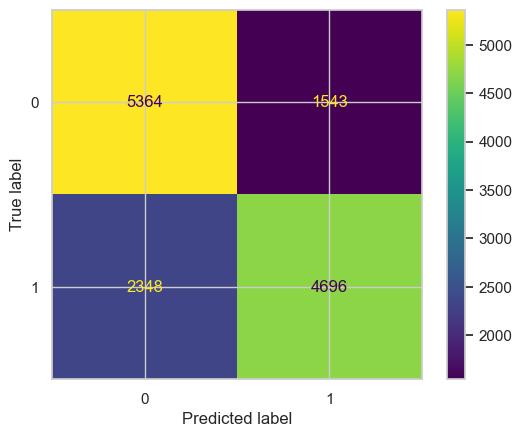

In [36]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [37]:
scores.append(accuracy_score(y_test, y_pred))
scores

[0.7112751774066375,
 0.5093541681599886,
 0.6272668625904954,
 0.7154325854777436,
 0.7210952619883879]

## Application du modèle le plus performant avec les données de ce bon vieux Arthur

In [38]:
nouvelle_donnee = [[19345, 2, 175, 85.0, 128, 96, 1, 1]]
prediction = model.predict(nouvelle_donnee)
print("Classe prédite :", prediction[0])

Classe prédite : 0


c:\Users\alixcover\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
nouvelle_donnee = [[19345, 1, 175, 85.0, 128, 96, 1, 1]]
prediction = model.predict(nouvelle_donnee)
print("Classe prédite :", prediction[0])

Classe prédite : 1


c:\Users\alixcover\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
